# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import DataSets

In [2]:
l_df = pd.read_csv('listings.csv')
c_df =pd.read_csv('calendar.csv')
r_df = pd.read_csv('reviews.csv')

# Wrangling of Listing DataSet


In [3]:
l_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
l_df.shape

(3585, 95)

In [5]:
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [6]:
l_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [7]:
#dropping NaNs
l_df.dropna(subset=["review_scores_rating", "price", "review_scores_value", "neighbourhood", 'host_response_time',
                        'host_response_rate', 'host_acceptance_rate', 'property_type'], axis = 0, inplace = True)

In [8]:
l_df.drop(["jurisdiction_names", "license", "has_availability", "square_feet", "neighbourhood_group_cleansed"],
              axis = 1, inplace = True)

In [9]:
l_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
      

In [10]:
pd.set_option('display.max_columns', None)
l_df.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2866,4484747,https://www.airbnb.com/rooms/4484747,20160906204935,2016-09-07,"Umass, MGH, City, BCEC, Longwood3E",Private room shared kitchen and bathroom with ...,"Best location, close to everything. Available ...",Private room shared kitchen and bathroom with ...,none,NaN,NaN,From airport: free silver line shuttle to sout...,NaN,NaN,"Respect yourself, respect other, clean up afte...",https://a2.muscache.com/im/pictures/56321785/8...,https://a2.muscache.com/im/pictures/56321785/8...,https://a2.muscache.com/im/pictures/56321785/8...,https://a2.muscache.com/im/pictures/56321785/8...,16442921,https://www.airbnb.com/users/show/16442921,Orchid,2014-06-05,"Boston, Massachusetts, United States",I enjoy meeting people from around the world a...,within a few hours,79%,100%,f,https://a0.muscache.com/im/users/16442921/prof...,https://a0.muscache.com/im/users/16442921/prof...,Dorchester,18,18,"['email', 'phone', 'reviews', 'kba']",t,t,"Crescent Avenue, Boston, MA 02125, United States",Dorchester,Dorchester,Boston,MA,02125,Boston,"Boston, MA",US,United States,42.319725,-71.054468,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Heating,""translat...",$49.00,$360.00,"$1,100.00",$100.00,$45.00,1,$0.00,3,60,5 days ago,5,35,65,340,2016-09-06,5,2014-11-10,2015-08-28,64.0,8.0,6.0,8.0,10.0,8.0,6.0,f,f,strict,f,f,15,0.22
1143,10671192,https://www.airbnb.com/rooms/10671192,20160906204935,2016-09-07,1 bedroom apt in Boston South End,Spacious one bedroom apartment complete with a...,Spacious 1 bedroom apartment on a quiet street...,Spacious one bedroom apartment complete with a...,none,"Great neighborhood, central location to many d...",It's a great apartment in (what I think is) Bo...,Very easy to travel on public transportation f...,Guest are free to use anything in the apartmen...,The place is all to yourself and is self check...,Have fun and please be respectful of the place...,https://a2.muscache.com/im/pictures/87e44a8c-0...,https://a2.muscache.com/im/pictures/87e44a8c-0...,https://a2.muscache.com/im/pictures/87e44a8c-0...,https://a2.muscache.com/im/pictures/87e44a8c-0...,44392534,https://www.airbnb.com/users/show/44392534,Nick,2015-09-17,"Boston, Massachusetts, United States",NaN,within a few hours,100%,95%,t,https://a2.muscache.com/im/pictures/7fd5db4a-c...,https://a2.muscache.com/im/pictures/7fd5db4a-c...,South End,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"West Springfield Street, Boston, MA 02118, Uni...",South End,South End,Boston,MA,02118,Boston,"Boston, MA",US,United States,42.339435,-71.080058,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"","

In [11]:
# Important Columns Selection
columns = ['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'property_type', 'accommodates', 'bathrooms',
        'beds', 'price', 'review_scores_value', 'review_scores_rating', 'review_scores_cleanliness',
        'review_scores_communication', 'review_scores_location', 'neighbourhood']

In [12]:
l_df = l_df[columns]

In [13]:
l_df.head(3)

,id,host_response_time,host_response_rate,host_acceptance_rate,property_type,accommodates,bathrooms,beds,price,review_scores_value,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,neighbourhood
1,3075044,within an hour,100%,100%,Apartment,2,1.0,1.0,$65.00,9.0,94.0,9.0,10.0,9.0,Roslindale
2,6976,within a few hours,100%,88%,Apartment,2,1.0,1.0,$65.00,10.0,98.0,9.0,10.0,9.0,Roslindale
4,7651065,within an hour,100%,100%,House,2,1.5,2.0,$79.00,10.0,99.0,10.0,10.0,9.0,Roslindale


In [14]:
# Converting Price Column to Value and remove '$' sign
prices = lambda x : (x.replace('.00','').replace('$','').replace(',',''))
l_df['price']=l_df['price'].apply(prices)
l_df['price'] = pd.to_numeric(l_df['price'])

In [15]:
l_df.price.head(3)

1    65
2    65
4    79
Name: price, dtype: int64

In [16]:
l_df.head(2)

,id,host_response_time,host_response_rate,host_acceptance_rate,property_type,accommodates,bathrooms,beds,price,review_scores_value,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,neighbourhood
1,3075044,within an hour,100%,100%,Apartment,2,1.0,1.0,65,9.0,94.0,9.0,10.0,9.0,Roslindale
2,6976,within a few hours,100%,88%,Apartment,2,1.0,1.0,65,10.0,98.0,9.0,10.0,9.0,Roslindale


In [17]:
# Converting host_response_rate Column to value and remove '%' Sign
hrr = lambda x : (x.replace('%',''))
l_df['host_response_rate']=l_df['host_response_rate'].apply(hrr)
l_df['host_response_rate'] = pd.to_numeric(l_df['host_response_rate'])

In [18]:
l_df.host_response_rate.head(3)

1    100
2    100
4    100
Name: host_response_rate, dtype: int64

In [19]:
# Converting host_acceptance_rate Column to value and remove '%' Sign
har = lambda x : (x.replace('%',''))
l_df['host_acceptance_rate']=l_df['host_acceptance_rate'].apply(har)
l_df['host_acceptance_rate'] = pd.to_numeric(l_df['host_acceptance_rate'])

In [20]:
l_df.host_acceptance_rate.head(3)

1    100
2     88
4    100
Name: host_acceptance_rate, dtype: int64

In [21]:
l_df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,property_type,accommodates,bathrooms,beds,price,review_scores_value,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,neighbourhood
1,3075044,within an hour,100,100,Apartment,2,1.0,1.0,65,9.0,94.0,9.0,10.0,9.0,Roslindale
2,6976,within a few hours,100,88,Apartment,2,1.0,1.0,65,10.0,98.0,9.0,10.0,9.0,Roslindale
4,7651065,within an hour,100,100,House,2,1.5,2.0,79,10.0,99.0,10.0,10.0,9.0,Roslindale
5,12386020,within a few hours,100,95,Condominium,2,1.0,1.0,75,10.0,100.0,10.0,10.0,9.0,Roslindale
7,2843445,within a few hours,100,100,House,2,2.0,1.0,75,10.0,96.0,10.0,10.0,10.0,Roslindale


# Wrangling of Reviews DataSet

In [22]:
r_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [23]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [24]:
r_df.shape

(68275, 6)

In [25]:
r_df.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


# Wrangling of Calendar DataSet

In [26]:
c_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [27]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [28]:
c_df.shape

(1308890, 4)

In [29]:
c_df['listing_id'] =c_df['listing_id'].astype(str)


In [30]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null object
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: object(4)
memory usage: 39.9+ MB


In [31]:
c_df.price.isnull().sum()/c_df.shape[0]

0.5087157820748879

In [32]:
c_df.dropna(subset=['price'],axis=0,inplace=True)
c_df.price.astype(str)

365        $65.00
366        $65.00
367        $65.00
368        $75.00
369        $75.00
370        $65.00
371        $65.00
372        $65.00
373        $65.00
374        $65.00
375        $75.00
376        $75.00
377        $65.00
378        $65.00
379        $65.00
380        $65.00
381        $65.00
382        $75.00
383        $75.00
384        $65.00
385        $65.00
386        $65.00
387        $65.00
388        $65.00
389        $75.00
390        $75.00
391        $65.00
392        $65.00
393        $65.00
394        $65.00
            ...  
1308845    $65.00
1308846    $65.00
1308847    $65.00
1308848    $65.00
1308849    $65.00
1308850    $65.00
1308851    $65.00
1308852    $65.00
1308853    $65.00
1308856    $65.00
1308857    $65.00
1308858    $65.00
1308859    $65.00
1308860    $65.00
1308861    $65.00
1308862    $65.00
1308863    $65.00
1308864    $62.00
1308865    $62.00
1308866    $62.00
1308870    $65.00
1308871    $62.00
1308872    $62.00
1308873    $62.00
1308874   

In [33]:
# Converting Price Column to Value and remove '$' sign
prices = lambda x : (x.replace('.00','').replace('$','').replace(',',''))
c_df.price=c_df.price.apply(prices)
c_df.price.head()

365    65
366    65
367    65
368    75
369    75
Name: price, dtype: object

In [34]:
c_df.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65
366,3075044,2017-08-21,t,65
367,3075044,2017-08-20,t,65
368,3075044,2017-08-19,t,75
369,3075044,2017-08-18,t,75


In [35]:
c_df.describe()

,listing_id,date,available,price
count,643037,643037,643037,643037
unique,2906,365,1,1246
top,8955473,2016-12-04,t,150
freq,365,2207,643037,20752


# Data Visualization


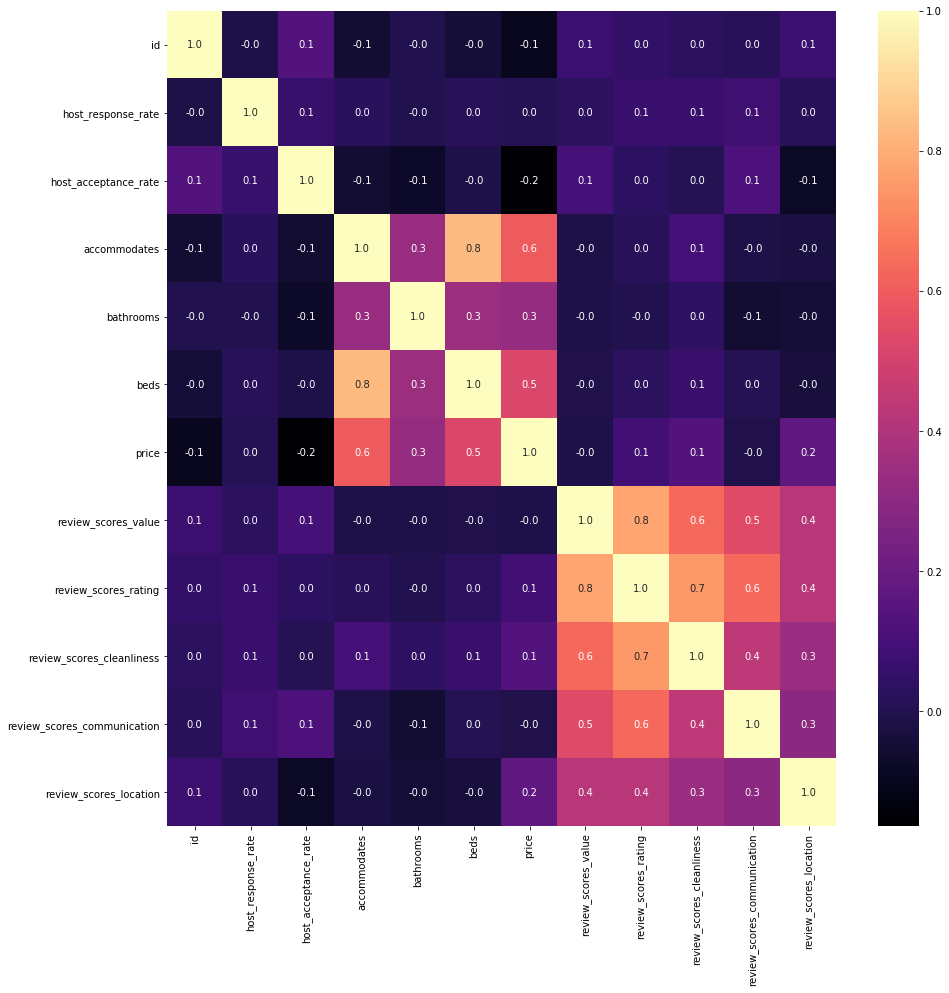

In [86]:
#building a heatmap for correlation visualisaton
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(l_df.corr(), annot=True, fmt='.1f',cmap = 'magma', ax=ax);

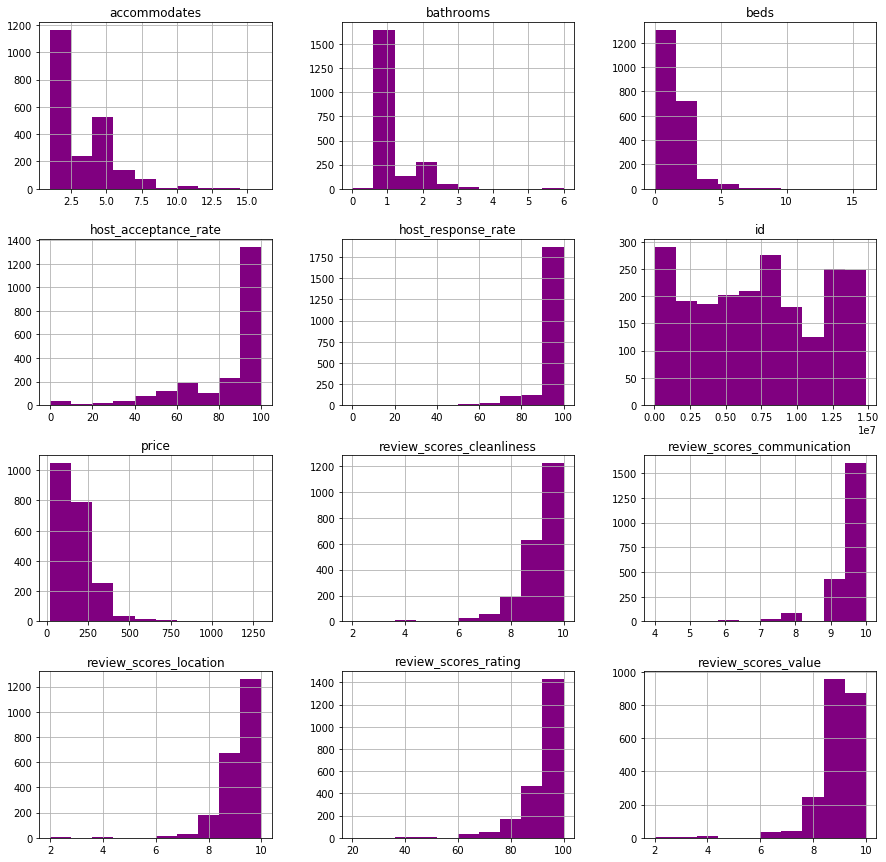

In [97]:
l_df.hist(figsize=(15,15),color='purple');

Text(0, 0.5, 'Price')

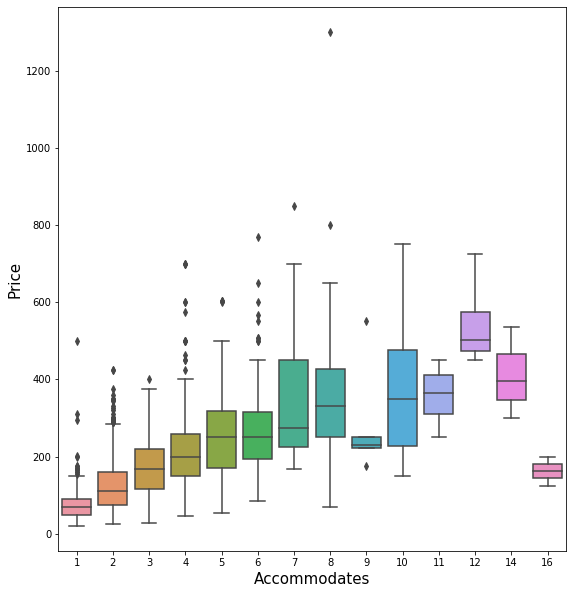

In [41]:
# Boxplots about accommodates and price
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='accommodates', y='price', data=l_df)
plt.xlabel(xlabel='Accommodates', fontsize=15)
plt.ylabel(ylabel='Price', fontsize=15)

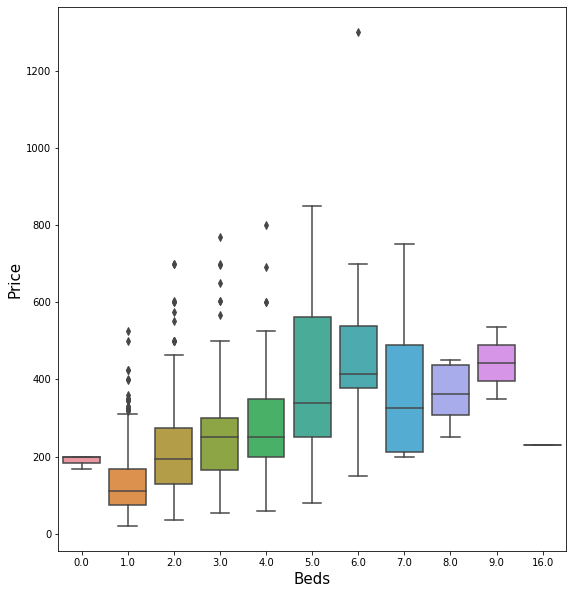

In [43]:
# Boxplots about Beds and price
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
sns.boxplot(x='beds', y='price', data=l_df)
plt.xlabel(xlabel='Beds', fontsize=15)
plt.ylabel(ylabel='Price', fontsize=15);

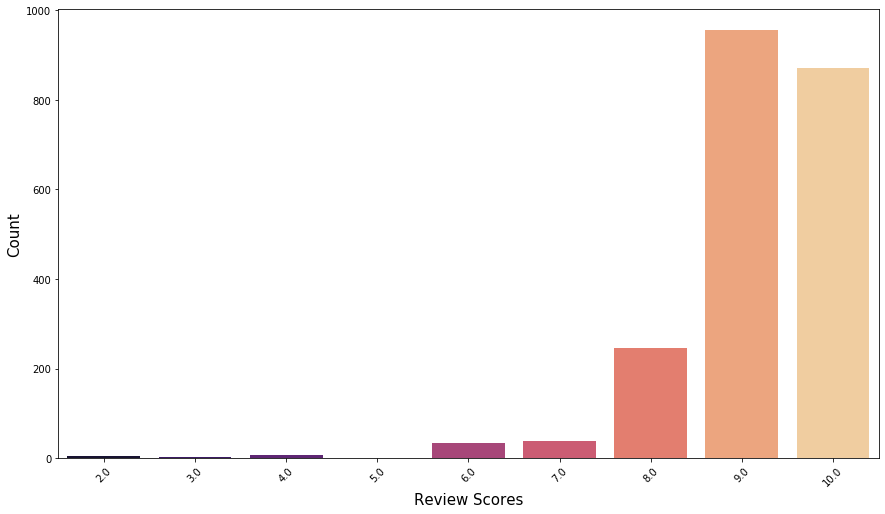

In [88]:
# number of reviews based on scores
plt.figure(figsize=(14.70, 8.27))
sns.countplot(data= c_df,palette= "magma", x= l_df['review_scores_value'])
plt.xlabel('Review Scores',fontsize= 15)
plt.ylabel('Count',fontsize= 15)
plt.xticks(rotation=45);

# Price Based on Neighbourhood

Text(0, 0.5, 'price')

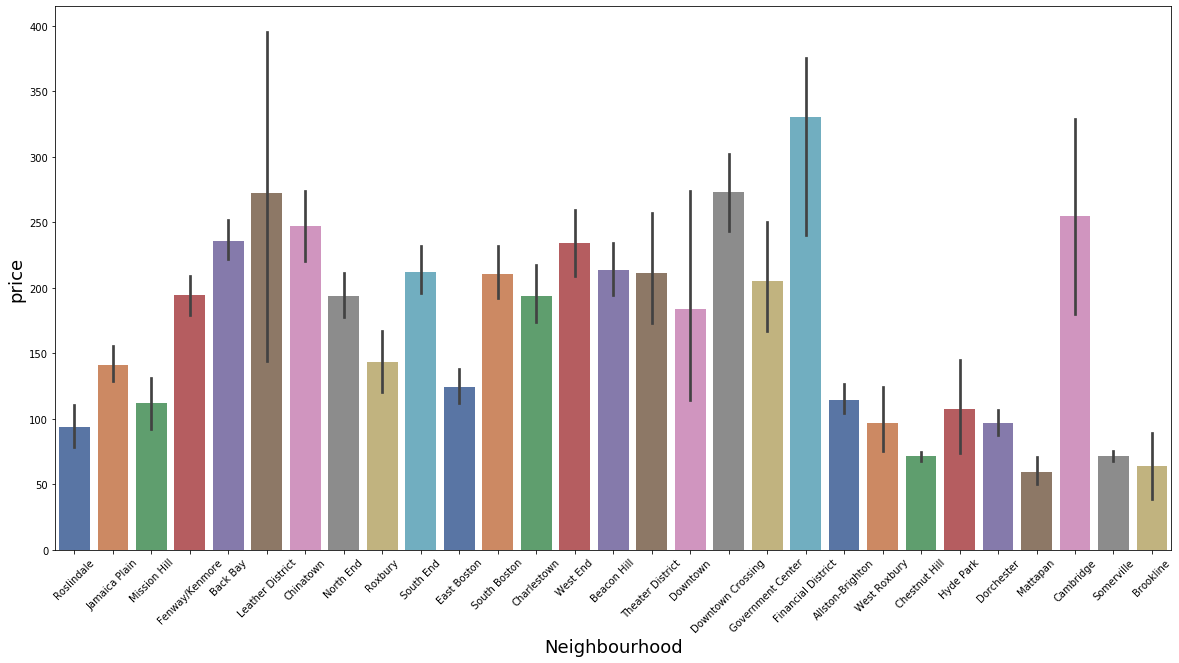

In [70]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
listings = l_df.sort_values(by = 'price')
sns.barplot(x='neighbourhood', y= 'price',palette= "deep", data = l_df)
plt.xlabel(xlabel='Neighbourhood', fontsize=18)
plt.ylabel(ylabel='price', fontsize=18)

# Reviews Based on Neigbourhood

Text(0, 0.5, 'review_scores_value')

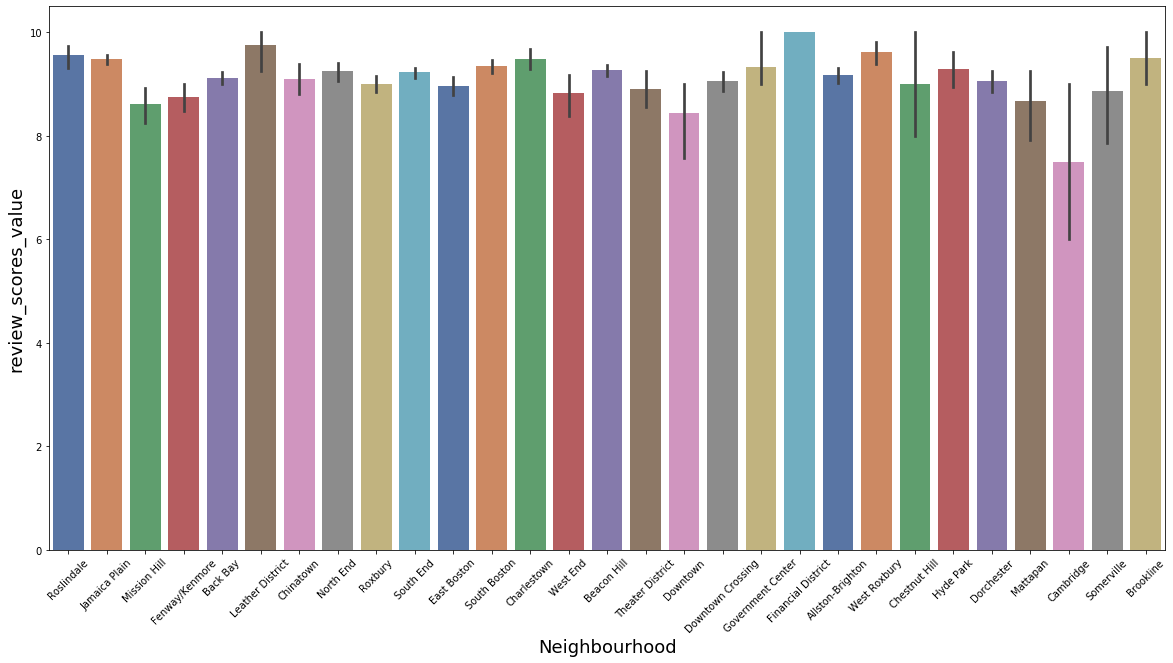

In [72]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
listings = l_df.sort_values(by = 'review_scores_value')
sns.barplot(x='neighbourhood', y= 'review_scores_value',palette= "deep", data = l_df)
plt.xlabel(xlabel='Neighbourhood', fontsize=18)
plt.ylabel(ylabel='review_scores_value', fontsize=18)